In [4]:
import pandas as pd # 导入Pandas数据处理工具包
df_ads = pd.read_csv('易速鲜花微信软文.csv') # 读入数据
df_ads.head() # 显示前几行数据


,点赞数,转发数,热度指数,文章评级,浏览量
0,2646,1347.0,7,5,260004
1,816,816.0,4,6,100004
2,1224,612.0,6,5,164502
3,1261,1261.0,6,6,163001
4,1720,1720.0,7,5,260401


In [5]:
#导入数据可视化所需要的库
import matplotlib.pyplot as plt # Matplotlib – Python画图工具库
import seaborn as sns # Seaborn – 统计学数据可视化工具库

# 设置中文字体，解决中文显示问题
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang SC', 'Heiti TC']  # macOS 中文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

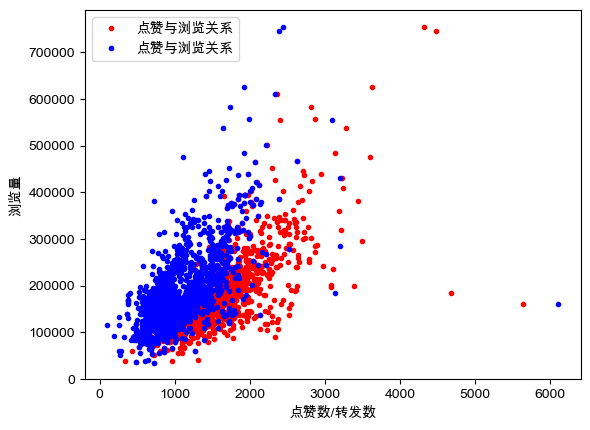

In [6]:
plt.plot(df_ads['点赞数'],df_ads['浏览量'],'r.', label='点赞与浏览关系') # 用matplotlib.pyplot的plot方法显示散点图
plt.plot(df_ads['转发数'],df_ads['浏览量'],'b.', label='点赞与浏览关系')
plt.xlabel('点赞数/转发数') # x轴Label
plt.ylabel('浏览量') # y轴Label
plt.legend() # 显示图例
plt.show() # 显示绘图结果！

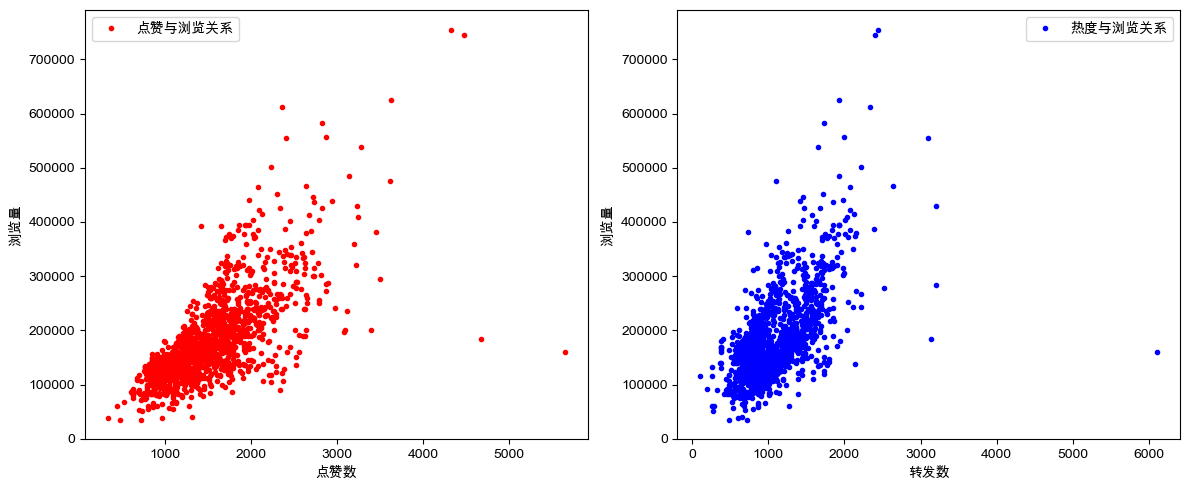

In [7]:
# 1. 创建画布和子图
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 左图：点赞数 vs 浏览量
axes[0].plot(df_ads['点赞数'], df_ads['浏览量'], 'r.', label='点赞与浏览关系')
axes[0].set_xlabel('点赞数')
axes[0].set_ylabel('浏览量')
axes[0].legend()

# 右图：热度指数 vs 浏览量
axes[1].plot(df_ads['转发数'], df_ads['浏览量'], 'b.', label='热度与浏览关系')
axes[1].set_xlabel('转发数')
axes[1].set_ylabel('浏览量')
axes[1].legend()

# 3. 调整布局
plt.tight_layout()

# 4. 显示
plt.show()

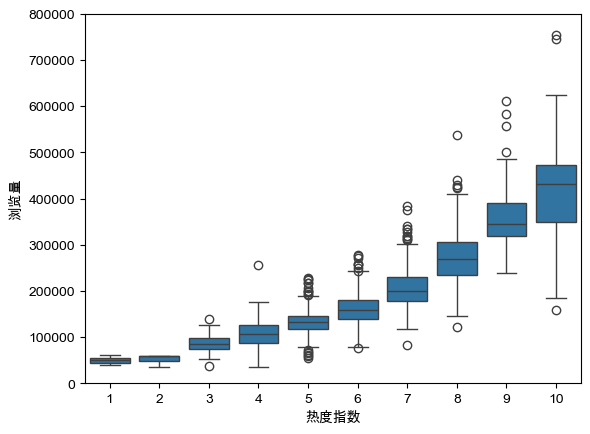

In [8]:
data = pd.concat([df_ads['浏览量'], df_ads['热度指数']], axis=1) # 浏览量和热度指数
fig = sns.boxplot(x='热度指数', y="浏览量", data=data) # 用seaborn的箱线图画图
fig.axis(ymin=0, ymax=800000); #设定y轴坐标

In [9]:
df_ads.isna().sum() # NaN出现的次数

点赞数      0
转发数     37
热度指数     0
文章评级     0
浏览量      0
dtype: int64

In [10]:
df_ads = df_ads.dropna() # 把出现了NaN的数据行删掉

In [11]:
X = df_ads.drop(['浏览量'],axis=1) # 特征集，Drop掉标签相关字段
X.head() # 显示前几行数据

,点赞数,转发数,热度指数,文章评级
0,2646,1347.0,7,5
1,816,816.0,4,6
2,1224,612.0,6,5
3,1261,1261.0,6,6
4,1720,1720.0,7,5


In [12]:
y = df_ads.浏览量 # 
y.head() #显示前几行数据

0    260004
1    100004
2    164502
3    163001
4    260401
Name: 浏览量, dtype: int64

In [ ]:
#将数据集进行80%（训练集）和20%（验证集）的分割
from sklearn.model_selection import train_test_split #导入train_test_split工具
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                   test_size=0.2, random_state=0)

## 选择算法并建立模型

In [19]:
from sklearn.linear_model import LinearRegression # 导入线性回归算法模型
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
linereg_model = LinearRegression() # 使用线性回归算法创建模型

# 创建一个管道：先标准化，再回归
normal_model = make_pipeline(StandardScaler(), LinearRegression())


## 训练模型

In [20]:
linereg_model.fit(X_train, y_train) # 用训练集数据，训练机器，拟合函数，确定内部参数
normal_model.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('standardscaler', ...), ('linearregression', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None


## 模型评估和优化

In [22]:
y_pred = linereg_model.predict(X_test) #预测测试集的Y值
y_normal_pred = normal_model.predict(X_test)

In [23]:
df_ads_pred = X_test.copy() # 测试集特征数据
df_ads_pred['浏览量真值'] = y_test # 测试集标签真值
df_ads_pred['浏览量预测值'] = y_pred # 测试集标签预测值
df_ads_pred['浏览量预测值(归一化后)'] = y_normal_pred
df_ads_pred #显示数据

,点赞数,转发数,热度指数,文章评级,浏览量真值,浏览量预测值,浏览量预测值(归一化后)
1074,1709,970.0,6,5,130003,181499.180492,181499.180492
404,1440,1440.0,4,4,118005,122478.101604,122478.101604
1375,1434,1454.0,7,5,189003,214815.847941,214815.847941
1317,832,832.0,6,6,105504,137486.350468,137486.350468
145,923,876.0,5,5,119501,110710.382414,110710.382414
...,...,...,...,...,...,...,...
420,1790,873.0,7,5,193004,211755.243385,211755.243385
1338,2622,1463.0,8,5,325002,301982.291922,301982.291922
542,1342,1372.0,6,5,161502,177814.080182,177814.080182
311,1663,1364.0,4,6,256002,136460.539585,136460.539585


## 内部参数结果和评估结果

In [26]:
print('当前模型的4个特征的权重分别是: ', linereg_model.coef_)
print('当前模型的截距（偏置）是: ', linereg_model.intercept_)
print("线性回归预测评分：", linereg_model.score(X_test, y_test)) # 评估模型

print('归一化模型的4个特征的权重分别是: ', normal_model[1].coef_)
print('归一化模型的截距（偏置）是: ', normal_model[1].intercept_)
print("归一化模型线性回归预测评分：", normal_model.score(X_test, y_test)) # 评估模型



当前模型的4个特征的权重分别是:  [   48.08395224    34.73062229 29730.13312489  2949.62196343]
当前模型的截距（偏置）是:  -127493.90606857155
线性回归预测评分： 0.740552064611524
归一化模型的4个特征的权重分别是:  [25747.54096135 14352.10159912 40268.79839195  3267.70635925]
归一化模型的截距（偏置）是:  182342.46485061513
归一化模型线性回归预测评分： 0.7405520646115238
